In [1]:
import pandas as pd
import numpy as np

#set up the random seed
seed = 7
np.random.seed(seed)

#using pandas to read the data form csv and get the feature varibales from table
dataframe = pd.read_csv("interstate.csv")
featureSet =['side','initiation','combat_location','combat_fatalities']


# split into input (X) and output (Y) variables
X = dataframe[featureSet].astype(float)
Y = dataframe['outcome']

In [2]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# split the train,and test set with the anaylze data and target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33,random_state =7)

# initial one hot encoded
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# fitting the X_train in the hot encode
ohe.fit(X_train)
#transform the analyzed variable in to the combiantion fearture set 
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)
#geting the size of feature 
data_length = len(ohe.get_feature_names())
# using labelencode to encode the output data in to 0,1 matrix 
encoder = preprocessing.LabelEncoder()
encoder.fit(y_test)
#tranform the data and enforce the data match the diminson 
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test,data_length)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train,data_length)


Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.model_selection import train_test_split
import datetime

# creat a sequential model with 150 variable input and 10 hidden layer.

def create_model(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_length, activation="relu")) 
# output  
    model.add(Dense(data_length, activation="softmax")) 
# multiple class using the categorical_crossentropy as loss funtiona
# adam for optimizer, since adam has a good performance for mutiple class classifation
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 
    return model
#init the kerasclassfier with training 10 epochs 
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=15)

#taining the data and verify it by the test set created above
history=model.fit(X_train_encoded,dummy_y_train,validation_data=(X_test_encoded,dummy_y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 225 samples, validate on 112 samples
Epoch 1/10
225/225 [==============================] - 2s 9ms/step - loss: 4.9646 - acc: 0.1022 - val_loss: 4.9384 - val_acc: 0.3125
Epoch 2/10
225/225 [==============================] - 0s 507us/step - loss: 4.8988 - acc: 0.3156 - val_loss: 4.8689 - val_acc: 0.4286
Epoch 3/10
225/225 [==============================] - 0s 484us/step - loss: 4.8130 - acc: 0.4311 - val_loss: 4.7732 - val_acc: 0.4821
Epoch 4/10
225/225 [==============================] - 0s 493us/step - loss: 4.6928 - acc: 0.4711 - val_loss: 4.6353 - val_acc: 0.5000
Epoch 5/10
225/225 [==============================] - 0s 480us/step - loss: 4.5224 - acc: 0.4756 - val_loss: 4.4388 - val_acc: 0.5357
Epoch 6/10
225/225 [==============================] - 0s 493us/step - loss: 4.2896 - acc: 0.4800 - val_loss: 4.1718 - val_acc: 0.5268
Epoch 7/10
225/225 [==============================] 

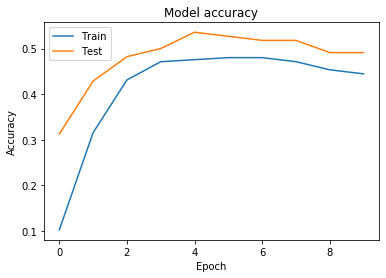

In [4]:
#polt the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

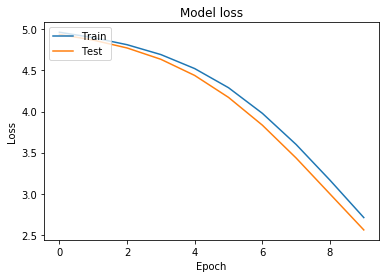

In [5]:
#plot the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#encodeing X 
ohe_fold = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_fold.fit(X)
X_fold_encoded = ohe_fold.transform(X)


data_fold_length = len(ohe_fold.get_feature_names())
#encoding Y
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
#tranform the data and enforce the data set as data_length to macth the input
encoded_Y = encoder.transform(Y)

dummy_Y = np_utils.to_categorical(encoded_Y,data_fold_length)


def create_model_fold(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_fold_length, activation="relu")) 

    model.add(Dense(8,activation="relu"))
    model.add(Dense(data_fold_length, activation="softmax")) 
# multiple class using the categorical_crossentropy as loss funtiona
# adam for optimizer, since adam has a good performance for mutiple class classifation
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 
    return model




In [9]:
#init the kerasclassfier with training 10 epochs 
model = KerasClassifier(build_fn=create_model_fold, epochs=10, batch_size=15)

#estimate the model with the kold and oouput the result


estimator = KerasClassifier(build_fn=create_model_fold, epochs=10, batch_size=5, verbose=0)
#10 time fold and cross with the shuffle data  
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#receive the score
results = cross_val_score(estimator, X_fold_encoded, dummy_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 69.72% (14.52%)


In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model_re(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_length, activation="relu")) 

    model.add(Dense(data_length)) 
    #regression is based on mean_square_error
    model.compile(loss="mse", optimizer="adam", metrics=["acc","mse"]) 
    return model
#using KerasRegressor as regression fucnction
model = KerasRegressor(build_fn=create_model_re, epochs=40, batch_size=10)
history=model.fit(X_train_encoded,dummy_y_train,validation_data=(X_test_encoded,dummy_y_test))


Train on 225 samples, validate on 112 samples
Epoch 1/40
225/225 [==============================] - 1s 5ms/step - loss: 0.0075 - acc: 0.0222 - mean_squared_error: 0.0075 - val_loss: 0.0068 - val_acc: 0.0625 - val_mean_squared_error: 0.0068
Epoch 2/40
225/225 [==============================] - 0s 764us/step - loss: 0.0066 - acc: 0.1422 - mean_squared_error: 0.0066 - val_loss: 0.0064 - val_acc: 0.2232 - val_mean_squared_error: 0.0064
Epoch 3/40
225/225 [==============================] - 0s 827us/step - loss: 0.0062 - acc: 0.3644 - mean_squared_error: 0.0062 - val_loss: 0.0061 - val_acc: 0.3304 - val_mean_squared_error: 0.0061
Epoch 4/40
225/225 [==============================] - 0s 733us/step - loss: 0.0059 - acc: 0.4133 - mean_squared_error: 0.0059 - val_loss: 0.0058 - val_acc: 0.3571 - val_mean_squared_error: 0.0058
Epoch 5/40
225/225 [==============================] - 0s 725us/step - loss: 0.0056 - acc: 0.4800 - mean_squared_error: 0.0056 - val_loss: 0.0054 - val_acc: 0.5446 - val_mea

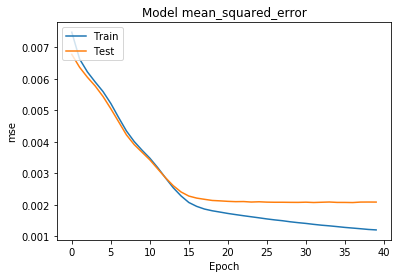

In [11]:
#plot the MSE
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()